## Delta Plots for Information Imbalance

In [3]:
import numpy as np

In [29]:
Imbalance_supervised = np.load("analysis_data/Innformation_imbalance_supervised.npy")
imbalance_unsup = np.load("analysis_data/Innformation_imbalance_unsupervised.npy")
y3 = np.load("analysis_data/descripotr_vs_propensity.npy")
Arr_des_prop = np.load("analysis_data/Innformation_imbalance_each_descripotr_vs_propensity.npy")

Info_imb_unsup = np.load("analysis_data/Info_imb_unsup.npy")
Info_imb_sup = np.load("analysis_data/Info_imb_sup.npy")
Debias_result= np.load("analysis_data/Debias_result.npy")
Random_Results = np.load("analysis_data/Random_Results.npy")

### Supervised One

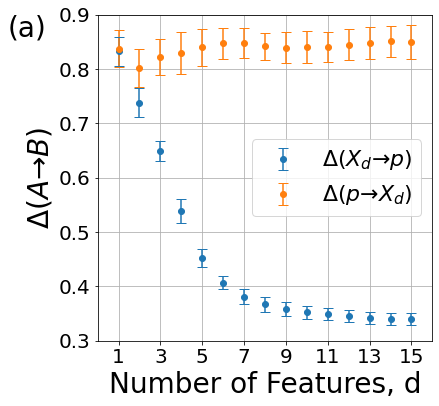

In [6]:
import numpy as np
impaort pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

X = np.arange(1,16,1)
Y1 = Imbalance_supervised[:10,:15]
Y2 = Imbalance_supervised[10:20,:15]

# Calculate mean and standard error
Y1_mean = np.mean(Y1, axis=0)
Y1_std = np.std(Y1, axis=0)
Y1_sem = Y1_std / np.sqrt(Y1.shape[0])

Y2_mean = np.mean(Y2, axis=0)
Y2_std = np.std(Y2, axis=0)
Y2_sem = Y2_std / np.sqrt(Y2.shape[0])


fig, ax = plt.subplots(figsize=(6,6))

plt.errorbar(X, Y1_mean, yerr=Y1_std, fmt='o', capsize=5, label=r'$\Delta (X_d \to p)$')
plt.errorbar(X, Y2_mean, yerr=Y2_std, fmt='o',  capsize=5, label=r'$\Delta (p\to  X_d)$')


plt.grid(True)
#plt.title('Information Imbalance Supervised', fontsize=16)
plt.xlabel('Number of Features, d', fontsize=28)
plt.ylabel(r"$\Delta (A \to B)$", fontsize=28)
plt.xticks([1,3,5,7,9,11,13,15],fontsize=20)
plt.yticks(fontsize=20)
ax.text(-0.27, 1.00, "(a)", ha="left", va="top", transform=ax.transAxes, fontsize=28)
plt.xlim([0,16])
plt.ylim([0.3,0.9])
plt.legend(fontsize=22)
#plt.savefig('2_Fig_5(a).png', dpi=600 , bbox_inches="tight")
plt.show()




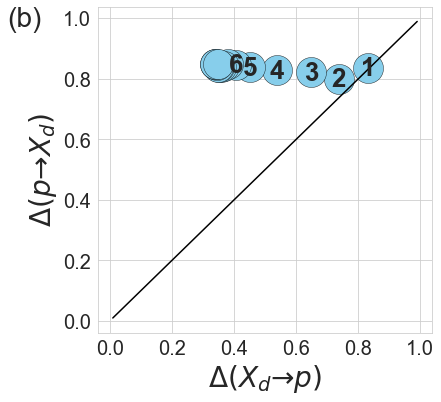

In [7]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

X = Imbalance_supervised[:10,:]
Y = Imbalance_supervised[10:20,:]

# Calculate mean and standard error
X_mean = np.mean(X, axis=0)
X_std = np.std(X, axis=0)
X_sem = X_std / np.sqrt(X.shape[0])

Y_mean = np.mean(Y, axis=0)
Y_std = np.std(Y, axis=0)
Y_sem = Y_std / np.sqrt(Y.shape[0])


dff = pd.DataFrame({
    'X': X_mean,
    'X_sem': X_sem,
    'X_std' : X_std,
    
    'Y': Y_mean,
    'Y_sem': Y_sem,
    'Y_std' : Y_std
})


sns.set_style("whitegrid")
sns.set_palette("deep")


plt.figure(figsize=(6, 6))

ax = sns.scatterplot(x='X', y='Y', data=dff , s = 900 , color = "skyblue" , edgecolor = "k"  , linewidth = 0.4)
ax = sns.lineplot(x = np.arange(0.01,1,0.01) , y = np.arange(0.01,1,0.01) , color = "k")

ax.errorbar(dff['X'], dff['Y'],  fmt='none', ecolor='gray', capsize=8)


for i, (x, y) in enumerate(zip(dff['X'], dff['Y']), 1):
    if i < 7:
        plt.annotate(
            str(i),  
            (x, y), 
            textcoords="offset points", 
            xytext=(0,-8),  
            ha='center',  
            fontsize=26,  
            fontweight='bold' 
        )

    

#plt.title('Information Imbalance Supervised', fontsize=16)
plt.xlabel(r"$\Delta (X_d \to p)$", fontsize=28)
plt.ylabel(r"$\Delta (p \to X_d)$", fontsize=28)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
ax.text(-0.27, 1.00, "(b)", ha="left", va="top", transform=ax.transAxes, fontsize=28)




#plt.savefig('2_Fig_5(b).png', dpi=600 , bbox_inches="tight")
plt.show()


### Unsupersied ones

Text(-0.27, 1.0, '(a)')

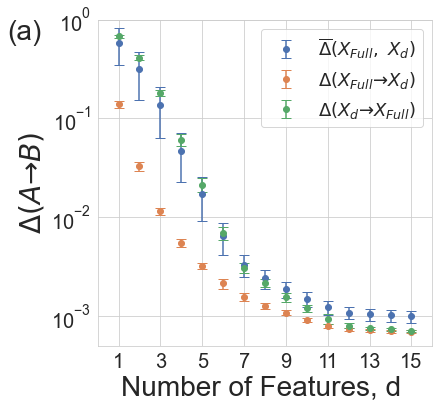

In [9]:
X = np.arange(1,16)

Y1 = imbalance_unsup[10:20,:].mean(axis = 0)
Y1_err =  imbalance_unsup[10:,:].std(axis = 0)

Y2 = imbalance_unsup[20:30,:].mean(axis = 0)
Y2_err = imbalance_unsup[20:30,:].std(axis = 0)

Y3 = imbalance_unsup[30:,:].mean(axis = 0)
Y3_err = imbalance_unsup[30:,:].std(axis = 0)


fig, ax = plt.subplots(figsize=(6,6))

plt.errorbar(X, Y1, yerr=Y1_err, fmt='o',  capsize=5, label=r'$\overline {\Delta} ({ X}_{ Full}, \ { X}_d)$')
plt.errorbar(X, Y2, yerr=Y2_err, fmt='o',  capsize=5, label=r'$\Delta (X_{Full} \to X_d)$')
plt.errorbar(X, Y3, yerr=Y3_err, fmt='o',  capsize=5, label=r'$\Delta (X_d \to X_{Full})$')

plt.legend(fontsize=18)
plt.yscale('log')
#plt.title('Information Imbalance Unsupervised', fontsize=16)
plt.xlabel('Number of Features, d ', fontsize=28)
plt.ylabel(r'$\Delta (A \to B)$', fontsize=28)
plt.xticks([1,3,5,7,9,11,13,15],fontsize = 20)
plt.xlim([0,16])
plt.ylim([5e-4,1])
plt.yticks(fontsize = 20)
ax.text(-0.27, 1.00, "(a)", ha="left", va="top", transform=ax.transAxes, fontsize=28)

#plt.savefig("2_Fig_6(a)" , dpi = 600 ,  bbox_inches="tight")

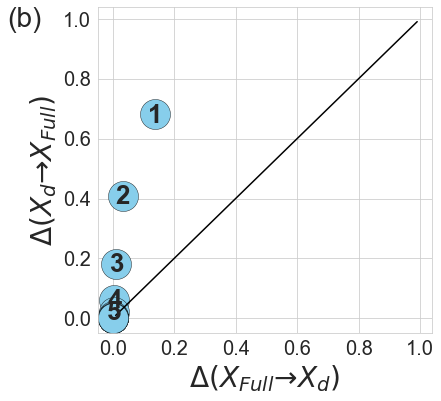

In [10]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

X = imbalance_unsup[20:30,:]
Y = imbalance_unsup[30:,:]

X_mean = np.mean(X, axis=0)
X_std = np.std(X, axis=0)
X_sem = X_std / np.sqrt(X.shape[0])

Y_mean = np.mean(Y, axis=0)
Y_std = np.std(Y, axis=0)
Y_sem = Y_std / np.sqrt(Y.shape[0])

dff = pd.DataFrame({
    'X': X_mean,
    'X_sem': X_sem,
    'X_std' : X_std,
    
    'Y': Y_mean,
    'Y_sem': Y_sem,
    'Y_std' : Y_std
})

sns.set_style("whitegrid")
sns.set_palette("deep")


plt.figure(figsize=(6, 6))
ax = sns.scatterplot(x='X', y='Y', data=dff , s = 900 , color = "skyblue" , edgecolor = "k"  , linewidth = 0.4)
ax = sns.lineplot(x = np.arange(0.01,1,0.01) , y = np.arange(0.01,1,0.01) , color = "k")

ax.errorbar(dff['X'], dff['Y'],  fmt='none', ecolor='gray', capsize=8)


for i, (x, y) in enumerate(zip(dff['X'], dff['Y']), 1):
    if i < 6:
        plt.annotate(
            str(i),  
            (x, y),  
            textcoords="offset points",  
            xytext=(0,-8),  
            ha='center',  
            fontsize=26, 
            fontweight='bold'  
        )

    

#plt.title('Information Imbalance Supervised', fontsize=16)
plt.xlabel(r"$\Delta (X_{Full} \to X_d)$", fontsize=28)
plt.ylabel(r"$\Delta (X_d \to X_{Full})$", fontsize=28)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
ax.text(-0.27, 1.00, "(b)", ha="left", va="top", transform=ax.transAxes, fontsize=28)




#plt.savefig('2_Fig_6(b).png', dpi=600 ,  bbox_inches="tight")
plt.show()



## Comparing Structural Descriptors between individual Descripotrs and Sup. Imbalance Result

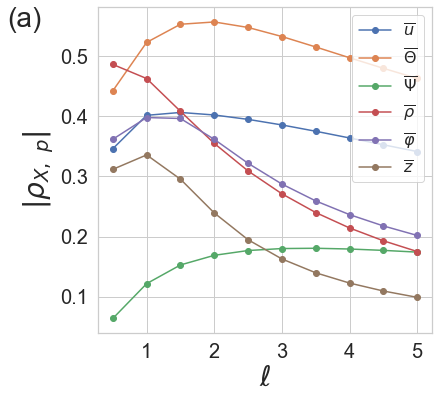

In [24]:
fig, ax = plt.subplots(figsize=(6,6))

plt.plot([0.5,1,1.5,2,2.5,3,3.5,4,4.5,5] , y3[20:30], marker = "o" , label = r"$\overline{u}$")
plt.plot([0.5,1,1.5,2,2.5,3,3.5,4,4.5,5] , y3[40:50] , marker = "o" , label = r"$\overline{\Theta}$")
plt.plot([0.5,1,1.5,2,2.5,3,3.5,4,4.5,5] , y3[30:40] , marker = "o" , label = r"$\overline{\Psi}$")
plt.plot([0.5,1,1.5,2,2.5,3,3.5,4,4.5,5] , y3[:10] , marker = "o" , label = r"$\overline{\rho}$")
plt.plot([0.5,1,1.5,2,2.5,3,3.5,4,4.5,5] , abs(y3[10:20]) , marker = "o" , label = r"$\overline{\varphi}$")
plt.plot([0.5,1,1.5,2,2.5,3,3.5,4,4.5,5] , abs(y3[50:60]) , marker = "o" , label = r"$\overline{z}$")

ax.legend(loc = "upper right" , fontsize = 16)
ax.set_xlabel(r"$\ell$",fontsize=28)
ax.set_ylabel(r"$|\rho_{X,\ p}|$", fontsize=28)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
# Add the (c) label
ax.text(-0.27, 1.00, "(a)", ha="left", va="top", transform=ax.transAxes, fontsize=28)


#plt.savefig('2_Fig_4(a).png', dpi=600, bbox_inches="tight")
plt.show()

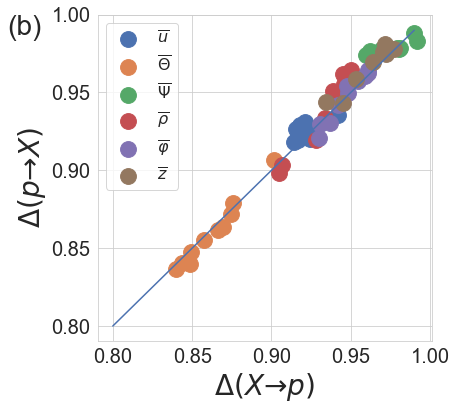

In [15]:
fig, ax = plt.subplots(figsize=(6,6))

plt.scatter(Arr_des_prop[:10,:].mean(axis = 0)[20:30],Arr_des_prop[10:,:].mean(axis = 0)[20:30] , label = r"$\overline{u}$" ,s = 250)
plt.scatter(Arr_des_prop[:10,:].mean(axis = 0)[40:50],Arr_des_prop[10:,:].mean(axis = 0)[40:50] , label = r"$\overline{\Theta}$" , s=250)
plt.scatter(Arr_des_prop[:10,:].mean(axis = 0)[30:40],Arr_des_prop[10:,:].mean(axis = 0)[30:40] , label = r"$\overline{\Psi}$", s =250)
plt.scatter(Arr_des_prop[:10,:].mean(axis = 0)[:10],Arr_des_prop[10:,:].mean(axis = 0)[:10] , label = r"$\overline{\rho}$", s = 250)
plt.scatter(Arr_des_prop[:10,:].mean(axis = 0)[10:20],Arr_des_prop[10:,:].mean(axis = 0)[10:20] , label = r"$\overline{\varphi}$" , s = 250)
plt.scatter(Arr_des_prop[:10,:].mean(axis = 0)[50:],Arr_des_prop[10:,:].mean(axis = 0)[50:] , label = r"$\overline{z}$" , s = 250)
#plt.scatter(arr_jp_1.mean() , arr_pj_1.mean() , label = r"$q$", s =150)
plt.plot(np.arange(0.8,1,0.01),np.arange(0.8,1,0.01))

ax.legend(loc = "upper left" , fontsize = 16)
ax.set_xlabel(r"$\Delta (X \to p)$" , fontsize=28)
ax.set_ylabel(r"$\Delta (p \to X)$" , fontsize=28)

ax.text(-0.27, 1.00, "(b)", ha="left", va="top", transform=ax.transAxes, fontsize=28)
plt.xticks([0.80,0.85,0.90,0.95,1.00],fontsize=20)
plt.yticks([0.80,0.85,0.90,0.95,1.00],fontsize=20)

#plt.savefig('2_Fig_4(b).png', dpi=600, bbox_inches="tight")
plt.show()


In [17]:
y1 = 1/Arr_des_prop[:10,:].mean(axis = 0)
y2 = 1/Arr_des_prop[10:,:].mean(axis = 0)

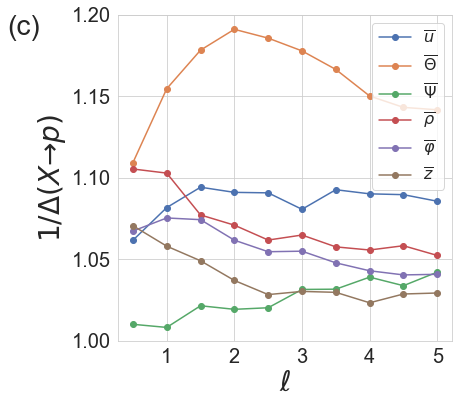

In [18]:
fig, ax = plt.subplots(figsize=(6,6))

plt.plot([0.5,1,1.5,2,2.5,3,3.5,4,4.5,5] , y1[20:30], marker = "o" , label = r"$\overline{u}$")
plt.plot([0.5,1,1.5,2,2.5,3,3.5,4,4.5,5] , y1[40:50] , marker = "o" , label = r"$\overline{\Theta}$")
plt.plot([0.5,1,1.5,2,2.5,3,3.5,4,4.5,5] , y1[30:40] , marker = "o" , label = r"$\overline{\Psi}$")
plt.plot([0.5,1,1.5,2,2.5,3,3.5,4,4.5,5] , y1[:10] , marker = "o" , label = r"$\overline{\rho}$")
plt.plot([0.5,1,1.5,2,2.5,3,3.5,4,4.5,5] , y1[10:20] , marker = "o" , label = r"$\overline{\varphi}$")
plt.plot([0.5,1,1.5,2,2.5,3,3.5,4,4.5,5] , y1[50:60] , marker = "o" , label = r"$\overline{z}$")


#plt.title("Delta Propensity-->Descripotr")
ax.set_xlabel(r"$\ell$",fontsize=28) 
ax.set_ylabel(r"$1/\Delta (X \to p)$" , fontsize=28)
ax.legend(loc = "upper right" , fontsize = 16)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
# Add the (c) label
ax.text(-0.33, 1.00, "(c)", ha="left", va="top", transform=ax.transAxes, fontsize=28)
plt.ylim([1,1.2])
plt.yticks([1.00,1.05,1.10,1.15,1.20])

#plt.savefig('2_Fig_4(c).png', dpi=600, bbox_inches="tight")
plt.show()

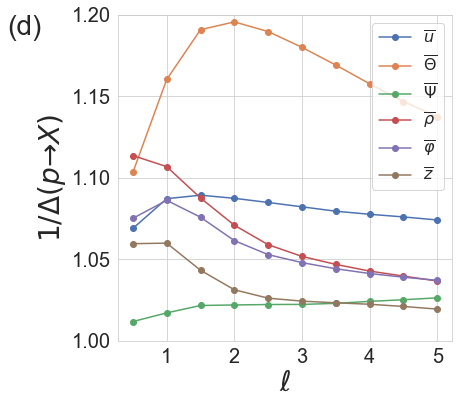

In [19]:
fig, ax = plt.subplots(figsize=(6, 6))

plt.plot([0.5,1,1.5,2,2.5,3,3.5,4,4.5,5] , y2[20:30], marker = "o" , label = r"$\overline{u}$")
plt.plot([0.5,1,1.5,2,2.5,3,3.5,4,4.5,5] , y2[40:50] , marker = "o" , label = r"$\overline{\Theta}$")
plt.plot([0.5,1,1.5,2,2.5,3,3.5,4,4.5,5] , y2[30:40] , marker = "o" , label = r"$\overline{\Psi}$")
plt.plot([0.5,1,1.5,2,2.5,3,3.5,4,4.5,5] , y2[:10] , marker = "o" , label = r"$\overline{\rho}$")
plt.plot([0.5,1,1.5,2,2.5,3,3.5,4,4.5,5] , y2[10:20] , marker = "o" , label = r"$\overline{\varphi}$")
plt.plot([0.5,1,1.5,2,2.5,3,3.5,4,4.5,5] , y2[50:60] , marker = "o" , label = r"$\overline{z}$")


#plt.title("Delta Propensity-->Descripotr")
ax.set_xlabel(r"$\ell$",fontsize=28) 
ax.set_ylabel(r"$1/\Delta (p \to X)$" , fontsize=28)
ax.legend(loc = "upper right" , fontsize = 16)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
# Add the (c) label
ax.text(-0.33, 1.00, "(d)", ha="left", va="top", transform=ax.transAxes, fontsize=28)
plt.ylim([1,1.2])
plt.yticks([1.00,1.05,1.10,1.15,1.20])

#plt.savefig('2_Fig_4(d).png', dpi=600, bbox_inches="tight")
plt.show()

## Plotting all Linear regressions result

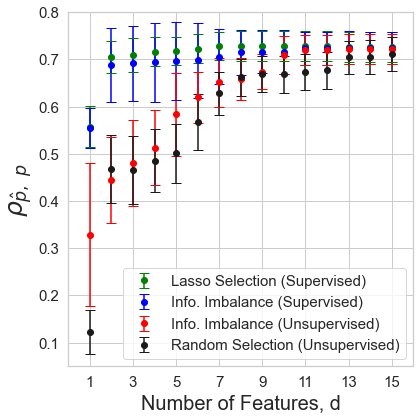

In [22]:
X = np.arange(1,16)

Info_imb_unsup_mean = Info_imb_unsup.mean(axis=0)
Info_imb_unsup_std = Info_imb_unsup.std(axis= 0)#/np.sqrt(10)

Info_imb_sup_mean = Info_imb_sup.mean(axis=0)
Info_imb_sup_std = Info_imb_sup.std(axis=0)#/np.sqrt(10)


Debias_result_mean = Debias_result.mean(axis = 0)
Debias_result_std = Debias_result.std(axis=0)#/np.sqrt(10)

Random_Results_mean = Random_Results.mean(axis=0)
Random_Results_std = Random_Results.std(axis=0)#/np.sqrt(10)

# Set the Seaborn style
sns.set(style="whitegrid")

# Create the plot
fig, ax = plt.subplots(figsize=(6,6))
#ax = sns.pointplot(x='X', y='Y', data=data, capsize=.2, join=True, ci='sd', errwidth=1.5)

# Add error bars manually
plt.errorbar(X, Debias_result_mean, yerr=Debias_result_std, fmt='o', capsize=5, label='Lasso Selection (Supervised)' , color = "green")

plt.errorbar(X, Info_imb_sup_mean, yerr=Info_imb_sup_std, fmt='o', capsize=5, label='Info. Imbalance (Supervised)' , color = "blue")
plt.errorbar(X, Info_imb_unsup_mean, yerr=Info_imb_unsup_std, fmt='o', capsize=5, label='Info. Imbalance (Unsupervised)' , color = "red")
plt.errorbar(X, Random_Results_mean, yerr=Random_Results_std, fmt='o', capsize=5, label='Random Selection (Unsupervised)' , color = "k")


# Customize the plot
plt.xlabel("Number of Features, d" , fontsize = 20)
ax.set_ylabel(r"$\rho_{\hat p,\ p}$", fontsize=25)
plt.xlim([0,16])
plt.ylim([0.05,0.8])
plt.xticks([1,3,5,7,9,11,13,15],fontsize=15)
plt.yticks(fontsize=15)
#plt.title('Plot with Error Bars and Line')
plt.legend(loc='lower right' , fontsize = 15)  # Move legend outside the plot
plt.grid(True)

# Show the plot
plt.tight_layout()  # Adjust layout to make room for the legend
#plt.savefig("2_Fig_7.png" , dpi = 600,  bbox_inches="tight")
plt.show()